In [125]:
from gensim.parsing.preprocessing import preprocess_documents, remove_stopwords, remove_short_tokens
from gensim.parsing.preprocessing import strip_punctuation
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from datetime import datetime
import pandas as pd

In [126]:
df = pd.read_csv('./data/wine_reviews.csv')
#df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [127]:
df['len_description'] = df['description'].apply(lambda x: len(x))

<Axes: >

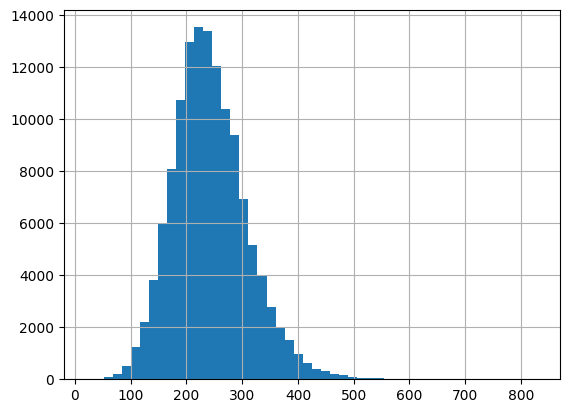

In [128]:
df['len_description'].hist(bins=50)

In [129]:
df['title'].value_counts()

title
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                         11
Korbel NV Brut Sparkling (California)                                           9
Segura Viudas NV Extra Dry Sparkling (Cava)                                     8
Ruinart NV Brut Rosé  (Champagne)                                               7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                         7
                                                                               ..
Cave de Tain 2009 Gambert de Loche  (Hermitage)                                 1
Les Vins de Vienne 2009 Les Barcillants  (Cornas)                               1
Jean-Luc Colombo 2009 La Louvée  (Cornas)                                       1
Jean-Luc Baldès 2009 Clos Triguedina The New Black Wine Malbec (Cahors)         1
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)     1
Name: count, Length: 118840, dtype: int64

In [130]:
df[df['title'] == 'Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,len_description
3209,3209,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,156
4399,4399,US,"Made predominantly from Pinot Noir, this is an...",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,221
27773,27773,US,A wonderfully drinkable sparkling wine that ap...,Sonoma Brut,90,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,254
63179,63179,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,252
65584,65584,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,252
81563,81563,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,218
90689,90689,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,156
94321,94321,US,"A bit rough and scouring in texture, this tast...",Sonoma Brut,85,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,152
100738,100738,US,"A good, dry and elegant bubbly. Shows crisp fl...",Sonoma Brut,89,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,178
109001,109001,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,200


In [131]:
print(df['description'][63179])
print(df['description'][65584])

Made from mostly Pinot Noir grapes, with an addition of 8.8% Chardonnay, this Méthode Champenoise wine is sultry in raspberry cream and crème brûlée, with enough acidity to keep it fresh in the glass. The finish offers a taste of toast with ginger jam.
Made from mostly Pinot Noir grapes, with an addition of 8.8% Chardonnay, this Méthode Champenoise wine is sultry in raspberry cream and crème brûlée, with enough acidity to keep it fresh in the glass. The finish offers a taste of toast with ginger jam.


In [132]:
df['description_clean'] = df['description'].apply(lambda x: x.lower())
df['description_clean'] = df['description_clean'].apply(lambda x: remove_stopwords(x))
df['description_clean'] = df['description_clean'].apply(lambda x: strip_punctuation(x))
df['description_clean'] = df['description_clean'].apply(lambda x: word_tokenize(x))
df['description_clean'] = df['description_clean'].apply(lambda x: [wnl.lemmatize(i) for i in x])
df['description_clean'] = df['description_clean'].apply(lambda x: remove_short_tokens(x))

In [133]:
splitted_texts = df['description_clean'].tolist()

In [134]:
idx = [str(i) for i in range(len(splitted_texts))]

tagged_documents = []
for i in range(len(splitted_texts)):
    tagged_documents.append(TaggedDocument(splitted_texts[i], [idx[i]]))

In [135]:
tagged_documents[10]

TaggedDocument(words=['soft', 'supple', 'plum', 'envelope', 'oaky', 'structure', 'cabernet', 'supported', 'merlot', 'coffee', 'chocolate', 'complete', 'picture', 'finishing', 'strong', 'end', 'resulting', 'value', 'priced', 'wine', 'attractive', 'flavor', 'immediate', 'accessibility'], tags=['10'])

In [136]:
def build_model(max_epochs, vec_size, alpha, tagged_documents):
    model = Doc2Vec(vector_size=vec_size,
                    alpha=alpha,
                    min_alpha=0.00025,
                    min_count=1,
                    dm=1)

    model.build_vocab(tagged_documents)

    for epoch in range(max_epochs):
        print(f"Iteration {epoch}")
        model.train(tagged_documents,
                    total_examples=model.corpus_count,
                    epochs=model.epochs)

        model.alpha -= 0.0002
        model.min_alpha = model.alpha
        
    
    return model

In [137]:
model = build_model(max_epochs=1, vec_size=50, alpha=0.025, tagged_documents=tagged_documents)

Iteration 0


In [138]:
model.save('./models/' + (datetime.utcnow().strftime('%Y_%m_%d_%H_%M_%S')) + '_doc2vec.model')

In [139]:
new_sentence = "Attractively ripe, this has fruity red-berry flavors along with acidity and soft tannins. This is ready to drink now."
original = new_sentence

In [140]:
new_sentence = new_sentence.lower()
new_sentence = remove_stopwords(new_sentence)
new_sentence = strip_punctuation(new_sentence)
new_sentence = word_tokenize(new_sentence)
new_sentence = [wnl.lemmatize(i) for i in new_sentence]
new_sentence = remove_short_tokens(new_sentence)
new_sentence_vectorized = model.infer_vector(new_sentence)
new_sentence_vectorized

array([ 0.12703598,  0.03682058, -0.0420127 ,  0.06554008,  0.03305516,
        0.02350347, -0.0574488 , -0.04128532,  0.15075804, -0.01298536,
       -0.06864986, -0.00301179,  0.06699679,  0.03756286,  0.06444427,
       -0.10382417,  0.01196183,  0.10688499, -0.06162093, -0.07593559,
        0.0809333 , -0.05830252, -0.3090337 ,  0.17371379, -0.09973281,
       -0.22324057,  0.10563476, -0.20991424, -0.12934811, -0.05309479,
        0.04167634, -0.05887583, -0.08959939,  0.04905371,  0.0207288 ,
       -0.01742984, -0.02206411,  0.13932462,  0.00277292, -0.05017012,
        0.0521977 ,  0.04537734, -0.04038573, -0.09492362, -0.15237214,
       -0.1943591 ,  0.03330302, -0.09059697,  0.1327138 ,  0.08207048],
      dtype=float32)

In [141]:
# Calculate cosine similarity. 
similar_sentences = model.dv.most_similar(positive=[new_sentence_vectorized])

In [142]:
similar_sentences

[('129014', 0.8135147094726562),
 ('128120', 0.7890603542327881),
 ('103723', 0.7885780930519104),
 ('86576', 0.7884041666984558),
 ('2749', 0.7810693383216858),
 ('88854', 0.7761382460594177),
 ('46361', 0.7745341062545776),
 ('40997', 0.7684140801429749),
 ('123889', 0.7672126293182373),
 ('106603', 0.7670496702194214)]

In [143]:
print('Original: ', original)
print('Simular:', df['description'][24997])

Original:  Attractively ripe, this has fruity red-berry flavors along with acidity and soft tannins. This is ready to drink now.
Simular: This wine is all bright cherry fruit with juicy acidity and a jammy character. It's delicious now, with its light tannins and bright raspberry aftertaste. Drink now.


In [144]:
model.wv.similar_by_word('berry')

[('raspberry', 0.8119252324104309),
 ('blackberry', 0.8037290573120117),
 ('licorice', 0.7062361240386963),
 ('cherry', 0.70391845703125),
 ('strawberry', 0.7023027539253235),
 ('blueberry', 0.6936397552490234),
 ('plum', 0.6809413433074951),
 ('black', 0.6563075184822083),
 ('chewy', 0.6555365920066833),
 ('currant', 0.6421284079551697)]

In [145]:
model.wv.similar_by_word('fruity')

[('fruitiness', 0.7544829845428467),
 ('attractive', 0.7323581576347351),
 ('perfumed', 0.7287551760673523),
 ('rounded', 0.7208541035652161),
 ('juicy', 0.7197499871253967),
 ('ripe', 0.700635552406311),
 ('flavored', 0.6942505240440369),
 ('fruit', 0.6838297843933105),
 ('ready', 0.6577211618423462),
 ('generous', 0.6494383811950684)]

In [146]:
model.wv.similar_by_word('acidity')

[('acid', 0.8148564100265503),
 ('flavor', 0.6879458427429199),
 ('richness', 0.6694888472557068),
 ('fruitiness', 0.6688607931137085),
 ('tangy', 0.665187418460846),
 ('acidic', 0.657796323299408),
 ('freshness', 0.6577640771865845),
 ('crispness', 0.6449536085128784),
 ('ripe', 0.6442955732345581),
 ('character', 0.640905499458313)]

In [147]:
model.wv.similar_by_word('delicious')

[('rich', 0.808125376701355),
 ('ripe', 0.7574532628059387),
 ('complex', 0.7188388705253601),
 ('great', 0.7156684398651123),
 ('ready', 0.7142340540885925),
 ('intense', 0.7033302783966064),
 ('attractive', 0.6955254077911377),
 ('generous', 0.692996621131897),
 ('opulent', 0.6783854365348816),
 ('crisp', 0.6725216507911682)]